In [1]:
import rawpy
import numpy as np
from scipy.ndimage.filters import convolve

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.figsize"] = 10, 15

In [2]:
H_G = np.asarray(
    [[0, 1, 0],
    [1, 4, 1],
    [0, 1, 0]], dtype=np.float64 ) / 4

H_RB = np.asarray(
    [[1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]], dtype=np.float64) / 4

In [40]:
import glob

raws = []
rpyraws = []
for i in sorted(glob.glob("../photos/positives/Norfolk & Cricket 1977/*.NEF"))[:25]:
    print(i)
    raw = rawpy.imread(i)
    rpyraws.append(raw)
    imcopy = raw.raw_image_visible.copy()
    pog = np.concatenate((
        convolve((imcopy*(raw.raw_colors_visible==0)), H_RB)[:,:,np.newaxis],
        convolve((imcopy*(raw.raw_colors_visible%2)), H_G)[:,:,np.newaxis],
        convolve((imcopy*(raw.raw_colors_visible==2)), H_RB)[:,:,np.newaxis],
    ), axis=2)
    
    raws.append(pog)
raws=np.asarray(raws)
raws

../photos/positives/Norfolk & Cricket 1977/DSC_0095.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0096.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0097.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0098.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0099.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0100.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0101.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0102.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0103.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0104.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0105.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0106.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0107.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0108.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0109.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0110.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0111.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0

array([[[[22,  9,  3],
         [20, 26,  6],
         [25, 14,  5],
         ...,
         [15, 18,  5],
         [12,  9,  4],
         [ 6, 21,  6]],

        [[20, 22,  6],
         [15, 20, 13],
         [17, 20, 11],
         ...,
         [11, 12, 10],
         [10, 10,  9],
         [ 5,  9, 12]],

        [[25, 14,  6],
         [17, 22, 12],
         [17, 20, 12],
         ...,
         [13, 11,  9],
         [13, 12,  7],
         [ 6, 16,  9]],

        ...,

        [[19, 18,  3],
         [12, 15,  6],
         [12, 17,  8],
         ...,
         [15, 20, 11],
         [14, 20,  8],
         [ 7, 16,  9]],

        [[19, 11,  3],
         [13, 13,  7],
         [13, 16,  8],
         ...,
         [14, 20, 11],
         [12, 20, 10],
         [ 6, 25, 12]],

        [[ 9, 25,  6],
         [ 6, 11, 12],
         [ 6, 21, 12],
         ...,
         [ 7, 14, 18],
         [ 6, 25, 17],
         [ 3, 10, 24]]],


       [[[18,  5,  2],
         [12, 11,  4],
         [13, 

In [4]:
rawsgamma = raws ** (1/2.4)
print("gammacc")

gammacc


In [5]:

pogawbb = np.percentile(rawsgamma[:,::10,::10], 10, (0, 1, 2))
pogawbw = np.percentile(rawsgamma[:,::10,::10], 99, (0, 1, 2))
print("wbcalc")
# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))

wbcalc


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2.042835438210507 -0.2632375945860114
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.9449539956184956 -0.2632375945860114
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2.042835438210507 -0.2632375945860114
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.5264375118191236 -0.2632375945860114
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.850498856185482 -0.2632375945860114
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.5345372698077016 -0.2632375945860114
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

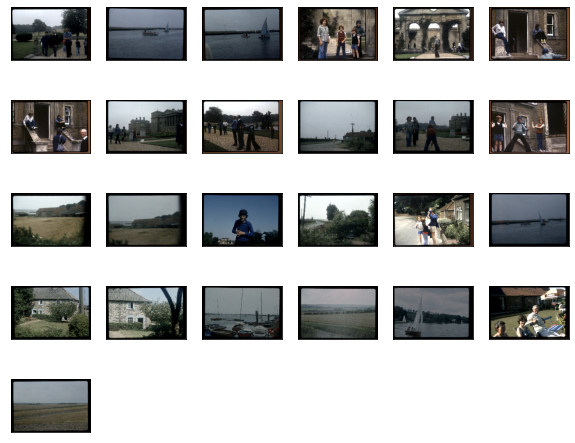

In [6]:
# plt.imshow(n[0][0].permute(1, 2, 0))
plt.figure(figsize=(10,10))
# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))
# print("wbs calc")
number = 36
offset = 0
outputs = []
for i in range(len(raws))[:number]:
    gridsize = number**0.5//1+(number**0.5%1>0)*1
    plt.subplot(gridsize, gridsize,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    pog = rawsgamma[i + offset] 
    
    # pogmed = np.median(pog, (0, 1))
    # print(i)
    toshow = (pog[::,::]-pogawbb)/(pogawbw-pogawbb)
    print(toshow.max(), toshow.min())
    outputs.append(toshow)
    plt.imshow(toshow[::30, ::30]*[1, 1, 1])
    # plt.xlabel(class_names[n[1][i]])

In [7]:
import imageio
# print(imageio.help("tiff"))
imageio.imwrite("test.jpg",(outputs[0].clip(0,1)*(2**8-1)).astype(np.uint8))


In [8]:
rawsgamma[5][1000:1005, 1000:1005,1]
# rpyraws[5].raw_colors_visible[1000:1005, 1000:1005]

array([[9.53388716, 9.3359425 , 9.48047536, 9.55159829, 9.56926356],
       [9.44463215, 9.26248717, 9.29931637, 9.46257752, 9.48047536],
       [9.16950524, 8.96015547, 9.24399545, 9.55159829, 9.58688329],
       [9.03706892, 9.01792661, 9.15074983, 9.42663893, 9.51612985],
       [9.0751842 , 8.92134983, 9.24399545, 9.48047536, 9.55159829]])

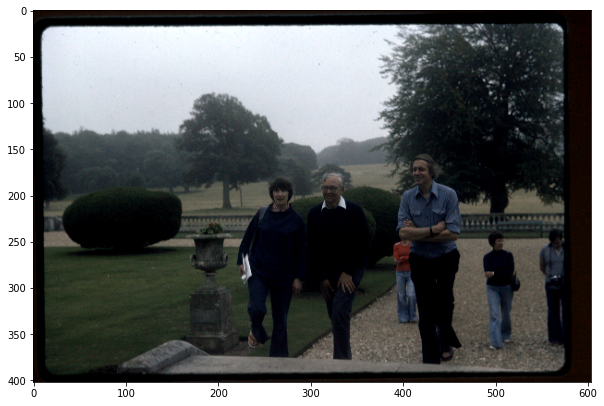

In [14]:
import matplotlib.colors
test = outputs[0][::10, ::10].clip(0,1)#*(2**8-1)).astype(np.uint8)
plt.imshow(test)

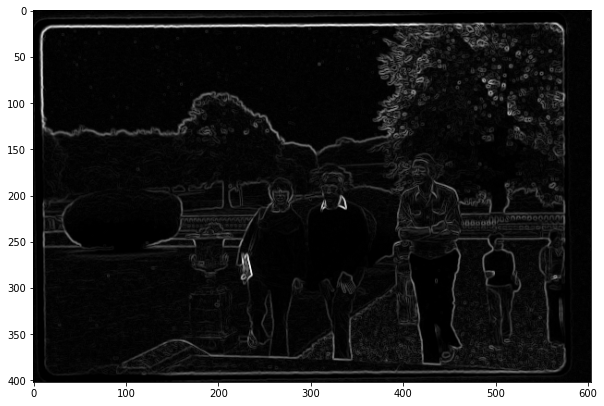

In [15]:
gx = convolve(test.mean(2), np.asarray([[1,2,1],[0, 0, 0],[-1,-2,-1]]))
gy = convolve(test.mean(2), np.asarray([[1,0,-1],[2, 0,-2],[1,0,-1]]))
edge = (gx**2+gy**2)**0.5

plt.imshow(edge, cmap='gray')

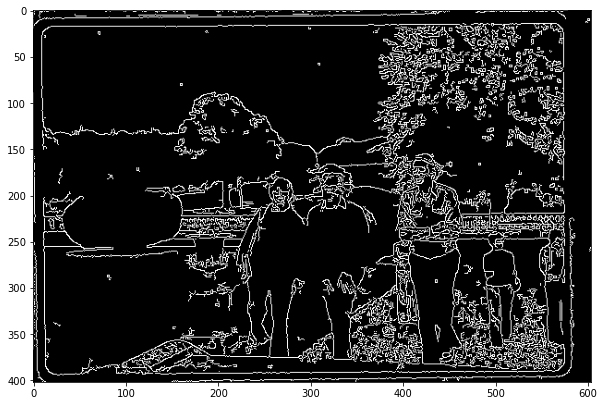

In [16]:
import cv2
plt.imshow(cv2.Canny((test*255).astype(np.uint8), 50, 140, 9), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


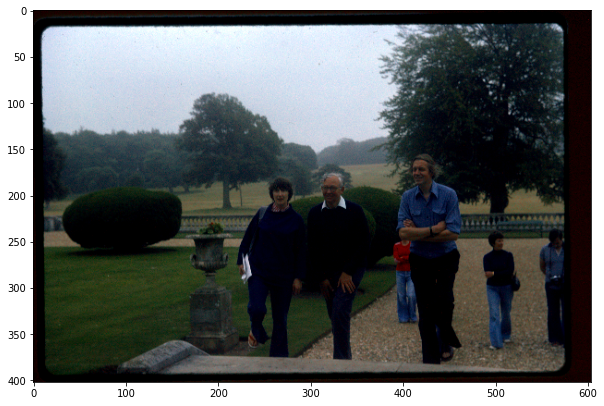

In [36]:
# test.astype(np.float32)
plt.imshow(cv2.cvtColor((cv2.cvtColor(test.astype(np.float32), cv2.COLOR_RGB2HSV)*[1, 1.8, 1]).astype(np.float32), cv2.COLOR_HSV2RGB))